## Scénario
Aujourd’hui est un grand jour, vous commencez votre mission chez BottleNeck, un marchand de vin très prestigieux. 
Le responsable du projet vous explique les enjeux de votre première mission :

 “Actuellement, pour gérer nos ressources, nos clients, etc., on utilise un ERP qui n’est absolument pas relié à notre site de vente en ligne. Pour être tout à fait honnête, les outils en place sont vraiment artisanaux et dans ces conditions, la gestion des stocks est vraiment complexe et notre visibilité en termes d’analyse des ventes sur le Net est vraiment réduite, car très peu de personnes ont accès au back-office. En attendant une solution plus centralisée, un rapprochement entre les 2 bases, même manuel, pourrait être très utile…

Ta première mission se passe en 3 points.

* Premièrement, j’ai besoin que tu rapproches deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...), il sont présentées pers les deux fichiers (1.xls, 2.xlsx). En plus de ces 2 exports, tu vas bénéficier d’une aide précieuse car Sylvie, notre ancienne stagiaire, a réalisé un travail de fourmi. Elle a créé un tableau Excel qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU) les données sont présentées par le fichier 3.xls ( En fait, la colonne id_web dans son fichier correspond au SKU des produits dans la boutique en ligne.)

* Deuxièmement, une fois le rapprochement effectué, je souhaiterais avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

* Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits. J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

**Nous voudrions présenter tes résultats lors de la prochaine réunion de COPIL. Cela permettrait de montrer nos progrès. Je peux t’épargner le travail d’une présentation par slides, il me faut juste un notebook que tu présenteras à l’assemblée pour expliquer ta démarche.**”

In [2]:
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from datetime import datetime

In [3]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
verboseMain = False
firstTime = time()

print("Chargement des données...")
#C:\Users\User\WORK\workspace-simplon-ia\projets\bottle_neck\1.xlsx
file_path = "C:\\Users\\User\\WORK\\workspace-simplon-ia\\projets\\bottle_neck\\"
file_name1 = '1.xlsx'
file_name2 = '2.xlsx'
file_name3 = '3.xlsx'

df_erp_export = pd.read_excel(file_path+file_name1)
df_id_link = pd.read_excel(file_path+file_name2)
df_web_export = pd.read_excel(file_path+file_name3)

t1 = (time() - firstTime)/60
print("Chargement des données", df_erp_export.shape,df_id_link.shape,df_web_export.shape, ".... in {0:.3f} minutes...................................... END".format(t1))

Chargement des données...


C:\Program Files\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Chargement des données (825, 5) (825, 2) (1513, 28) .... in 0.013 minutes...................................... END


In [4]:
df_erp_export.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [29]:
df_erp_export.shape

(825, 5)

In [30]:
df_id_link.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [7]:
df_web_export.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [8]:
df_web_export.shape

(1513, 28)

# Rapprochement des exports

* un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et 
* un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...), 

ils sont présentées pers les deux fichiers (1.xls, 2.xlsx). Elle a créé un tableau Excel qui permet d’établir le lien entre la référence du produit dans l’ERP (*product_id*) et la référence du même produit dans la base de la boutique en ligne (*SKU*) les données sont présentées par le fichier 3.xls ( En fait, la colonne id_web dans son fichier correspond au SKU des produits dans la boutique en ligne.)

In [5]:
df_merge_1 = df_erp_export.merge(df_id_link, on="product_id")
df_merge_1["NAN"] = df_merge_1.isna().sum(axis=1)
df_merge_1["NAN"]

0      0
1      0
2      0
3      0
4      0
      ..
820    1
821    1
822    0
823    0
824    0
Name: NAN, Length: 825, dtype: int64

In [12]:
df_merge_1.shape

(825, 6)

In [13]:
df_merge_1.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [6]:
df_merge_1_index = df_merge_1.copy()

In [7]:
df_merge_1_index.set_index("id_web", inplace=True)
df_merge_1_index.head()

,product_id,onsale_web,price,stock_quantity,stock_status,NAN
id_web,,,,,,
15298,3847,1,24.2,0,outofstock,0
15296,3849,1,34.3,0,outofstock,0
15300,3850,1,20.8,0,outofstock,0
19814,4032,1,14.1,0,outofstock,0
19815,4039,1,46.0,0,outofstock,0


In [8]:
df_web_export.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [9]:
df_web_export = df_web_export.rename(columns={"sku": "id_web"})
df_web_export.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [10]:
df_web_export["NAN"] = df_web_export.isna().sum(axis=1)
df_web_export = df_web_export.sort_values('NAN')
df_web_export.shape

(1513, 29)

In [11]:
df_web_export_clean_product = df_web_export[df_web_export['post_type']=='product']
df_web_export_clean_product.shape

(716, 29)

In [12]:
df_web_export_clean_product = df_web_export_clean_product.drop_duplicates('id_web', keep='first')
df_web_export_clean_product.shape

(715, 29)

In [13]:
df_result = df_merge_1.merge(df_web_export_clean_product, on="id_web", how="left")
df_result.shape

(825, 35)

In [14]:
df_result.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,NAN_x,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,NAN_y
0,3847,1,24.2,0,outofstock,15298,0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0
1,3849,1,34.3,0,outofstock,15296,0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0
2,3850,1,20.8,0,outofstock,15300,0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0
3,4032,1,14.1,0,outofstock,19814,0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0
4,4039,1,46.0,0,outofstock,19815,0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0


In [15]:
# Ecriture du fichier pour vérifier le résulat du merge et du concat
file_path = 'C:\\Users\\User\\WORK\\workspace-simplon-ia\\projets\\bottle_neck\\'
now = datetime.now() # current date and time
date_time = now.strftime("%Y-%m-%d-%H_%M_%S")
df_result.to_csv(file_path+'bottle_neck_' + date_time + '.csv', sep='\t', index=True)

In [16]:
df_result.columns

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'id_web', 'NAN_x', 'virtual', 'downloadable', 'rating_count',
       'average_rating', 'total_sales', 'tax_status', 'tax_class',
       'post_author', 'post_date', 'post_date_gmt', 'post_content',
       'post_title', 'post_excerpt', 'post_status', 'comment_status',
       'ping_status', 'post_password', 'post_name', 'post_modified',
       'post_modified_gmt', 'post_content_filtered', 'post_parent', 'guid',
       'menu_order', 'post_type', 'post_mime_type', 'comment_count', 'NAN_y'],
      dtype='object')

<AxesSubplot:>

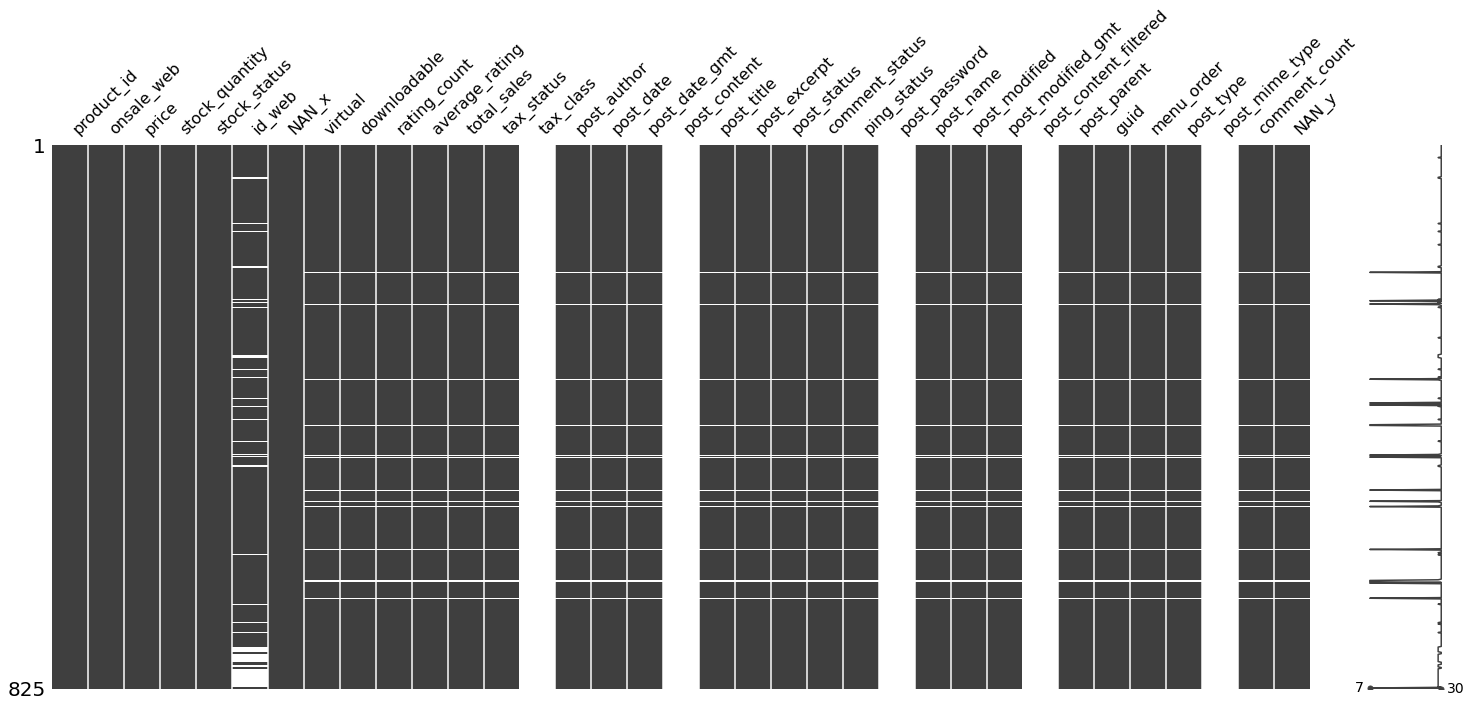

In [65]:
msno.matrix(df_result)

<AxesSubplot:>

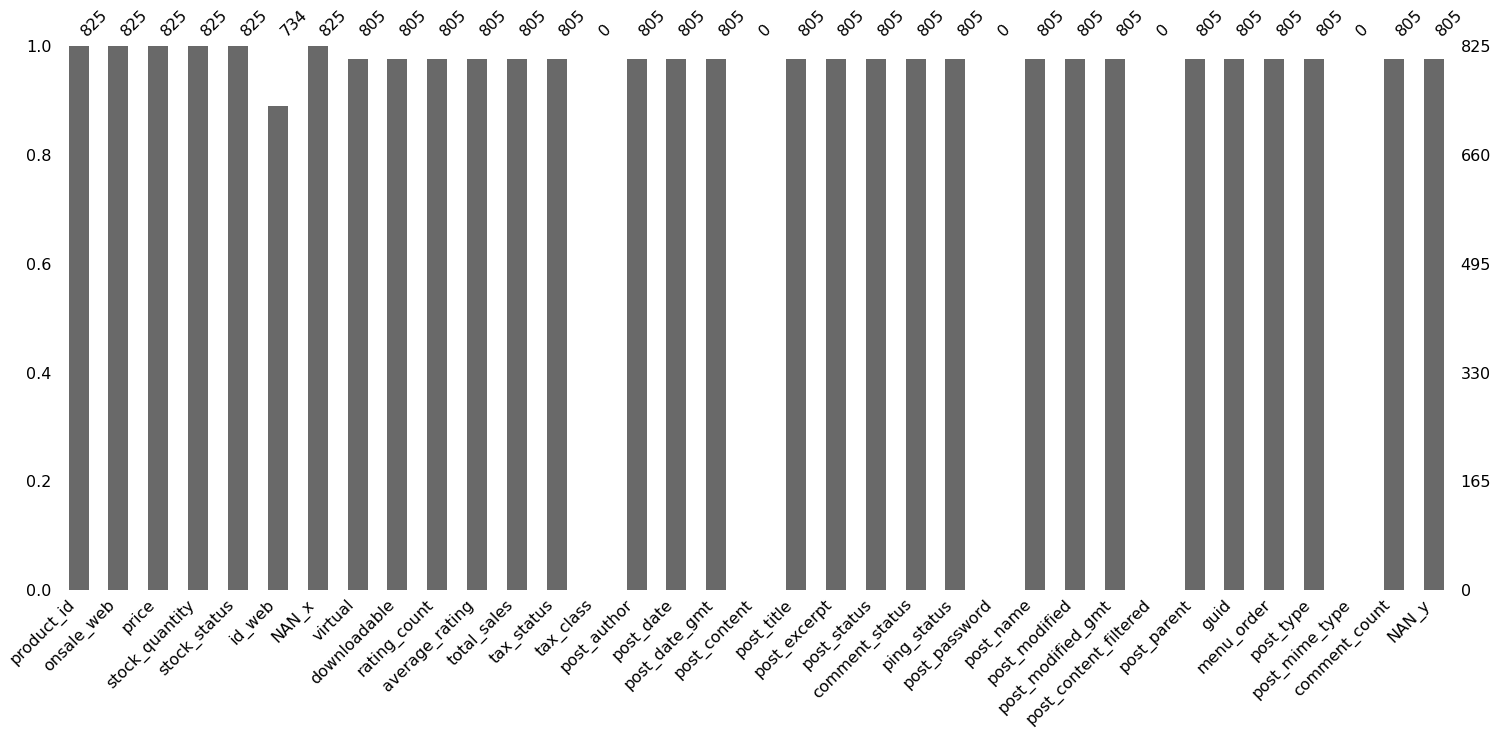

In [66]:
msno.bar(df_result)

<AxesSubplot:>

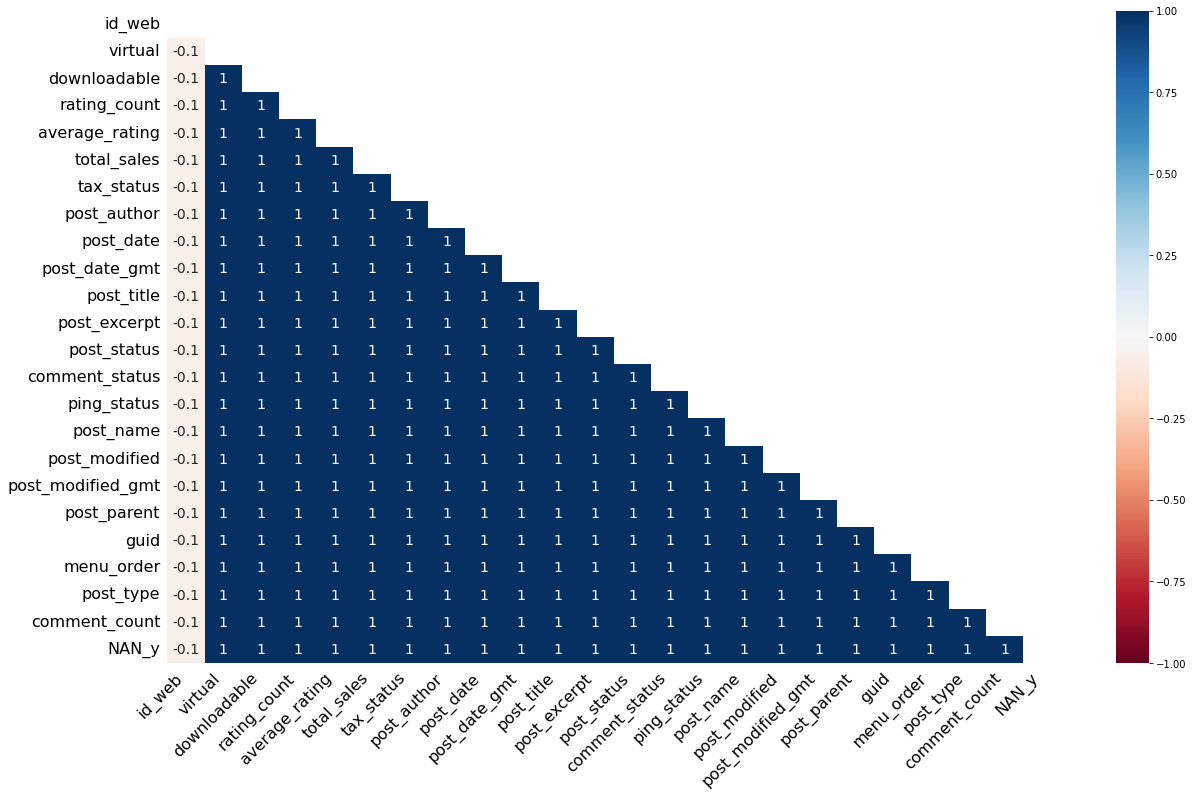

In [67]:
msno.heatmap(df_result)

<AxesSubplot:>

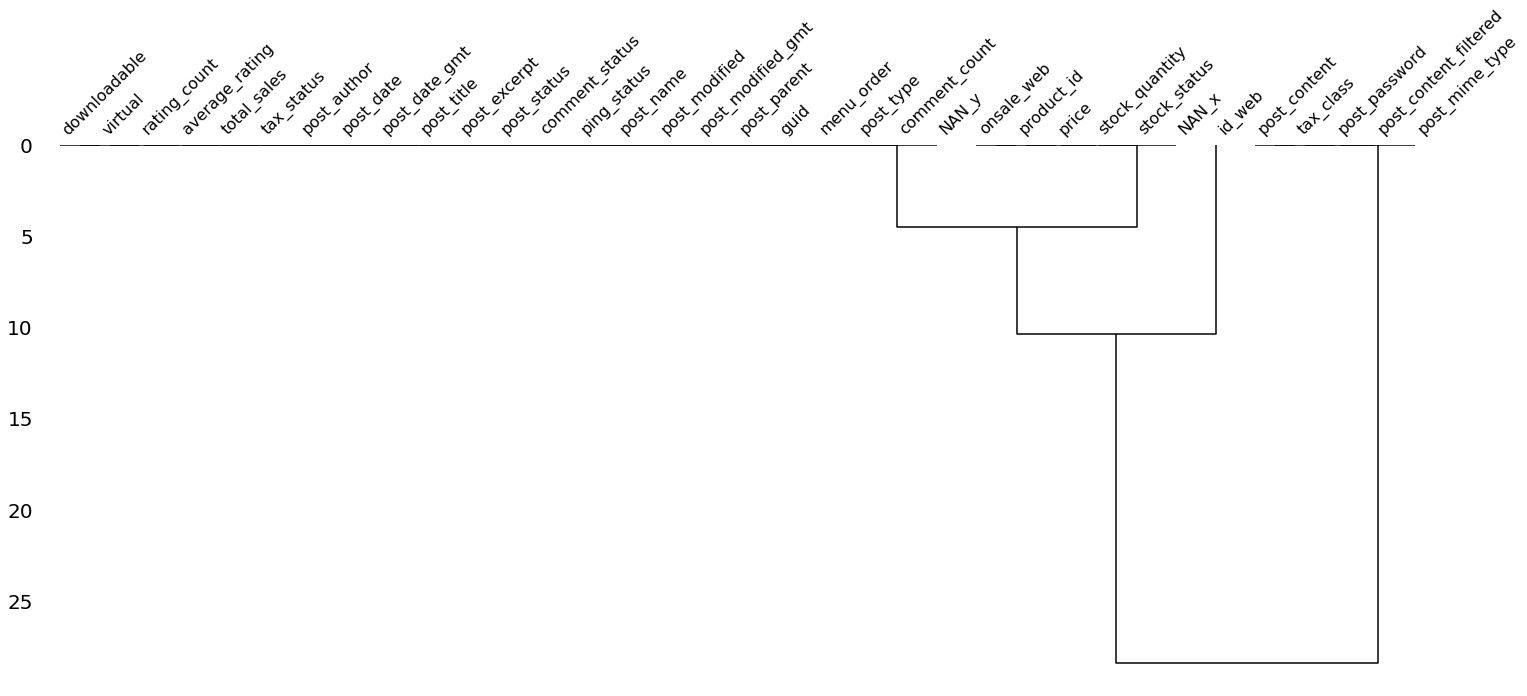

In [68]:
msno.dendrogram(df_result)

# chiffre d’affaires par produit
Deuxièmement, une fois le rapprochement effectué, je souhaiterais avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

In [17]:
df_result["ca"] = df_result["total_sales"] * df_result["price"]
df = df_result.sort_values('ca', ascending=False)
df[['product_id', 'post_title',"ca"]]


,product_id,post_title,ca
203,4334,Champagne Gosset Grand Blanc de Blancs,4704.0
74,4144,Champagne Gosset Grand Rosé,4263.0
227,4402,Cognac Frapin VIP XO,2288.0
73,4142,Champagne Gosset Grand Millésime 2006,1590.0
72,4141,Champagne Gosset Grande Réserve,1560.0
...,...,...,...
661,5954,NaN,NaN
662,5955,NaN,NaN
664,5957,NaN,NaN
687,6100,NaN,NaN


In [18]:
df[['product_id',"price","total_sales","ca"]]

,product_id,price,total_sales,ca
203,4334,49.0,96.0,4704.0
74,4144,49.0,87.0,4263.0
227,4402,176.0,13.0,2288.0
73,4142,53.0,30.0,1590.0
72,4141,39.0,40.0,1560.0
...,...,...,...,...
661,5954,18.8,NaN,NaN
662,5955,27.3,NaN,NaN
664,5957,39.0,NaN,NaN
687,6100,12.9,NaN,NaN


In [19]:
df["ca"].sum()

70568.6

# Analyse des données

Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits. J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.


In [72]:
df.describe()

,product_id,onsale_web,price,stock_quantity,NAN_x,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,NAN_y,ca
count,825.000000,825.000000,825.000000,825.000000,825.000000,805.0,805.0,805.0,805.0,805.000000,0.0,805.000000,0.0,0.0,0.0,805.0,805.0,805.0,805.000000,805.000000
mean,5162.597576,0.869091,32.415636,26.496970,0.110303,0.0,0.0,0.0,0.0,3.559006,NaN,1.998758,NaN,NaN,NaN,0.0,0.0,0.0,5.113043,87.662857
std,902.644635,0.337506,26.795849,45.892422,0.313457,0.0,0.0,0.0,0.0,8.121776,NaN,0.035245,NaN,NaN,NaN,0.0,0.0,0.0,0.316843,291.437137
min,3847.000000,0.000000,5.200000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,5.000000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,5.000000,0.000000
50%,4907.000000,1.000000,24.400000,11.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,5.000000,0.000000
75%,5805.000000,1.000000,42.000000,34.000000,0.000000,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,5.000000,75.600000
max,7338.000000,1.000000,225.000000,578.000000,1.000000,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,6.000000,4704.000000


In [20]:
df["name"] = df["post_title"]
df["name"]

203    Champagne Gosset Grand Blanc de Blancs
74                Champagne Gosset Grand Rosé
227                      Cognac Frapin VIP XO
73      Champagne Gosset Grand Millésime 2006
72            Champagne Gosset Grande Réserve
                        ...                  
661                                       NaN
662                                       NaN
664                                       NaN
687                                       NaN
823                                       NaN
Name: name, Length: 825, dtype: object

In [21]:
# On sort le nom du vin et son millésime
# Planeta Sicilia La Segreta Bianco 2017
df["name"] = df["name"].str.replace(' [1-2](0|[7-9])[0-9][0-9]$',  '', regex=True)
df["name"] = df["name"].str.strip()
df["name"]


203    Champagne Gosset Grand Blanc de Blancs
74                Champagne Gosset Grand Rosé
227                      Cognac Frapin VIP XO
73           Champagne Gosset Grand Millésime
72            Champagne Gosset Grande Réserve
                        ...                  
661                                       NaN
662                                       NaN
664                                       NaN
687                                       NaN
823                                       NaN
Name: name, Length: 825, dtype: object

In [22]:
df["millesime"] = df["post_title"].str[-4:]
df["millesime"]

203    ancs
74     Rosé
227    P XO
73     2006
72     erve
       ... 
661     NaN
662     NaN
664     NaN
687     NaN
823     NaN
Name: millesime, Length: 825, dtype: object

In [23]:
df["millesime"] = df["millesime"].str.replace("[a-zA-Z]*",  '', regex=True)
df["millesime"] = df["millesime"].str.strip()

In [24]:
df.loc[df["millesime"].str.len()<4, "millesime"] = np.nan
df["millesime"].value_counts()

2017    278
2018    150
2016    111
2019     63
2015     56
2014     20
2012     15
2013     14
2011      9
2008      8
2007      4
2010      3
2009      2
2005      1
1270      1
2006      1
2003      1
2002      1
Name: millesime, dtype: int64

In [105]:
df["millesime"].isna().sum()

87

In [26]:
df["millesime"].fillna(value=0, inplace=True)

In [27]:
df["millesime"].isna().sum()

0

In [28]:
df["millesime"] = df["millesime"].astype(int)
df["millesime"].dtypes

dtype('int32')

In [29]:
df["millesime"].value_counts()

2017    278
2018    150
2016    111
0        87
2019     63
2015     56
2014     20
2012     15
2013     14
2011      9
2008      8
2007      4
2010      3
2009      2
2006      1
2003      1
2005      1
1270      1
2002      1
Name: millesime, dtype: int64

In [32]:
data_name = "millesime"
#df.loc[df[column] > 100, column]
df_millesime = df[df[data_name]>1000]
df_millesime

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,NAN_x,virtual,downloadable,rating_count,...,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,NAN_y,ca,name,millesime
73,4142,1,53.0,8,instock,11641,0,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0,1590.0,Champagne Gosset Grand Millésime,2006
208,4352,1,225.0,0,outofstock,15940,0,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0,1125.0,Champagne Egly-Ouriet Grand Cru Millésimé,2008
82,4153,1,29.0,0,outofstock,16237,0,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0,1044.0,Elian Daros Côtes du Marmandais Clos Baquey,2015
706,6206,1,25.2,120,instock,16580,0,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0,1033.2,Domaine Giudicelli Patrimonio Blanc,2019
31,4068,1,16.6,157,instock,16416,0,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0,1029.2,Gilles Robin Crozes-Hermitage Rouge Papillon,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,4798,0,12.7,0,outofstock,NaN,1,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6.0,0.0,Pierre Jean Villa Côte Rôtie Fongeant,2017
383,4797,1,78.0,0,outofstock,14506,0,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0,0.0,Domaine Peyre Rose Clos des Cistes,2008
381,4794,1,41.6,0,outofstock,12771,0,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0,0.0,Maurice Schoech Riesling Grand Cru Rangen de T...,2014
380,4793,1,18.7,17,instock,15730,0,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5.0,0.0,Maurice Schoech Pinot Gris Grand Cru Schlossberg,2017


In [30]:
def displayBarGraphSeabornOneSerie(df, xName, title, verbose=False, show=True, isY=False):
    if not isY:
        g = sns.barplot(x=df[xName].value_counts().index,y=df[xName].value_counts())
        g.set_ylabel("NB " + xName)
        g.set_xlabel(xName + " Index")
    else:
        g = sns.barplot(x=df[xName].value_counts(), y=df[xName].value_counts().index)
        g.set_xlabel("NB " + xName)
        g.set_ylabel(xName + " Index")
    plt.title(title)
    if show: plt.show()

def displayBarGraphSeaborn(df, xName, yName, hueName, title, verbose=False):
    g = sns.barplot(x=xName,y=yName, hue=hueName, data=df)
    g.set_ylabel(yName)
    g.set_xlabel(xName)
    plt.title(title)
    plt.show()

In [129]:
df_millesime["post_title"].value_counts()

Pierre Jean Villa Côte Rôtie Fongeant 2017                                     91
Clos du Mont-Olivet Châteauneuf-du-Pape 2007                                    2
Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016     2
Domaine Hauvette IGP Alpilles Jaspe 2017                                        2
Champagne Gosset Grand Millésime 2006                                           1
                                                                               ..
Château Plaisance Fronton To Co Que Cal 2015                                    1
Weingut Besson-Strasser Zürich Pinot Noir Chlosterberg 2016                     1
Domaine de La Tour Du Bon Bandol Rosé 2019                                      1
Paul Ginglinger Riesling Grand Cru Pfersigberg 2018                             1
Domaine Saint-Nicolas Vin de France Blanc Les Clous 2019                        1
Name: post_title, Length: 645, dtype: int64

In [130]:
df_millesime[df_millesime["post_title"]=="Pierre Jean Villa Côte Rôtie Fongeant 2017"]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,NAN_x,virtual,downloadable,rating_count,...,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,NAN_y,ca,name,millesime
788,7008,0,40.0,5,instock,NaN,1,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6.0,0.0,Pierre Jean Villa Côte Rôtie Fongeant,2017
789,7009,0,40.0,10,instock,NaN,1,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6.0,0.0,Pierre Jean Villa Côte Rôtie Fongeant,2017
790,7010,0,47.0,37,instock,NaN,1,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6.0,0.0,Pierre Jean Villa Côte Rôtie Fongeant,2017
791,7015,0,45.0,12,instock,NaN,1,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6.0,0.0,Pierre Jean Villa Côte Rôtie Fongeant,2017
794,7081,0,45.0,17,instock,NaN,1,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6.0,0.0,Pierre Jean Villa Côte Rôtie Fongeant,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,4692,0,12.0,48,instock,NaN,1,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6.0,0.0,Pierre Jean Villa Côte Rôtie Fongeant,2017
449,4973,0,10.0,0,outofstock,NaN,1,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6.0,0.0,Pierre Jean Villa Côte Rôtie Fongeant,2017
416,4911,0,23.0,0,outofstock,NaN,1,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6.0,0.0,Pierre Jean Villa Côte Rôtie Fongeant,2017
396,4874,0,14.6,0,outofstock,NaN,1,0.0,0.0,0.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6.0,0.0,Pierre Jean Villa Côte Rôtie Fongeant,2017


In [33]:
df_millesime_to_drop = df_millesime[(df_millesime["post_title"]=="Pierre Jean Villa Côte Rôtie Fongeant 2017") & (df_millesime["total_sales"]<1)]
df_millesime_to_drop.shape

(91, 38)

<function matplotlib.pyplot.show(close=None, block=None)>

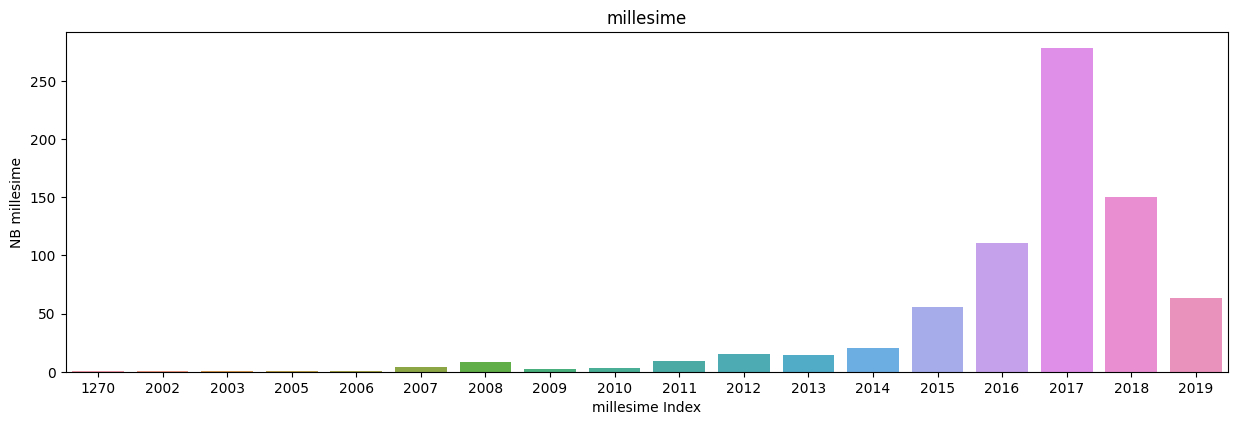

In [43]:
figure, axes = plt.subplots(1, 1)
data_nova2 = df_millesime[[data_name, "price"]]
displayBarGraphSeabornOneSerie(data_nova2, data_name, data_name, show=False)
figure.set_size_inches(15, 4.5, forward=True)
figure.set_dpi(100)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

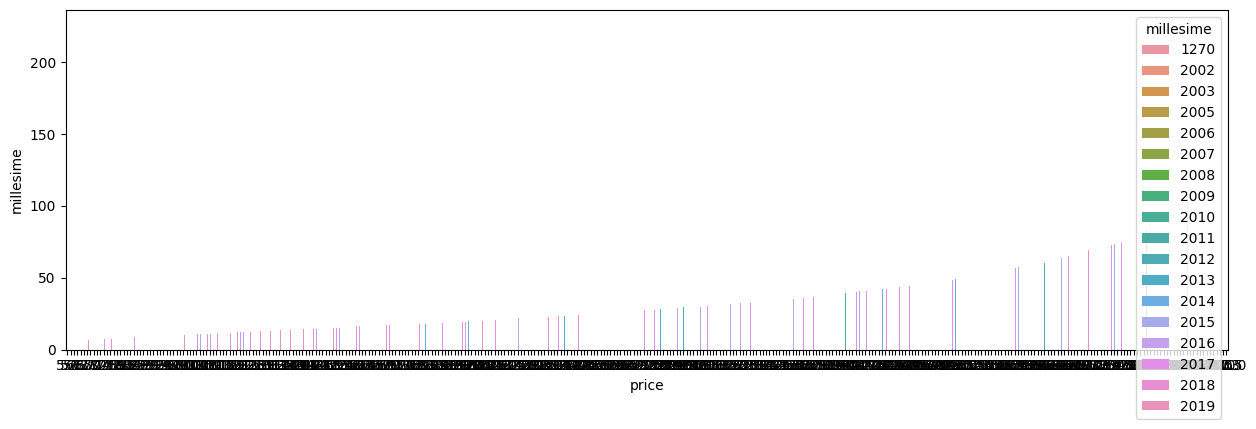

In [44]:
figure, axes = plt.subplots(1, 1)
g = sns.barplot(data=df_millesime, x="price",y="price", hue=data_name)
g.set_ylabel(data_name)
g.set_xlabel("price")
figure.set_size_inches(15, 4.5, forward=True)
figure.set_dpi(100)
plt.show

In [47]:
# Calculer le nombre de prix par nom de bouteille pour voir s'il y a des incohérences
df_millesime[["post_title", "price"]].value_counts()

post_title                                            price
Pierre Jean Villa Côte Rôtie Fongeant 2017            45.0     13
                                                      31.0     12
                                                      40.0      7
                                                      27.0      4
                                                      30.0      4
                                                               ..
Domaine Hauvette IGP Alpilles Dolia 2013              48.5      1
Domaine Hauvette IGP Alpilles Jaspe 2017              26.7      1
                                                      27.7      1
Domaine Hauvette Les Baux de Provence Amethyste 2017  69.8      1
Zind-Humbrecht Zind 2017                              25.7      1
Length: 691, dtype: int64

In [49]:
# Calculer le nombre de prix par nom de bouteille pour voir s'il y a des incohérences
df_millesime_in_stock = df_millesime[df_millesime["stock_quantity"]>0]
df_millesime_in_stock_count = df_millesime_in_stock[["post_title", "price"]].value_counts()
df_millesime_in_stock_count

post_title                                                                price
Pierre Jean Villa Côte Rôtie Fongeant 2017                                45.0     13
                                                                          31.0     12
                                                                          40.0      7
                                                                          21.0      4
                                                                          27.0      4
                                                                                   ..
Domaine Chambeyron Côtes du Rhône 2017                                    12.9      1
Domaine Chambeyron Côte Rôtie Lancement 2017                              60.4      1
Domaine Chambeyron Côte Rôtie La Chavarine 2017                           38.6      1
Domaine Chambeyron Côte Rôtie L'Angéline 2017                             48.4      1
Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint

In [56]:
df_millesime_in_stock_count[df_millesime_in_stock_count > 1]

post_title                                    price
Pierre Jean Villa Côte Rôtie Fongeant 2017    45.0     13
                                              31.0     12
                                              40.0      7
                                              21.0      4
                                              27.0      4
                                              30.0      3
                                              26.0      2
Clos du Mont-Olivet Châteauneuf-du-Pape 2007  54.8      2
Pierre Jean Villa Côte Rôtie Fongeant 2017    47.0      2
                                              28.0      2
dtype: int64

In [61]:
res = df_millesime_in_stock["post_title"].value_counts()
res[res>1]

Pierre Jean Villa Côte Rôtie Fongeant 2017      62
Clos du Mont-Olivet Châteauneuf-du-Pape 2007     2
Domaine Hauvette IGP Alpilles Jaspe 2017         2
Name: post_title, dtype: int64

In [37]:
millesime_stock_sum = df_millesime.groupby([data_name], as_index=False)['stock_quantity'].sum()
millesime_stock_sum

,millesime,stock_quantity
0,1270,0
1,2002,0
2,2003,10
3,2005,2
4,2006,8
5,2007,58
6,2008,65
7,2009,34
8,2010,34
9,2011,29


<function matplotlib.pyplot.show(close=None, block=None)>

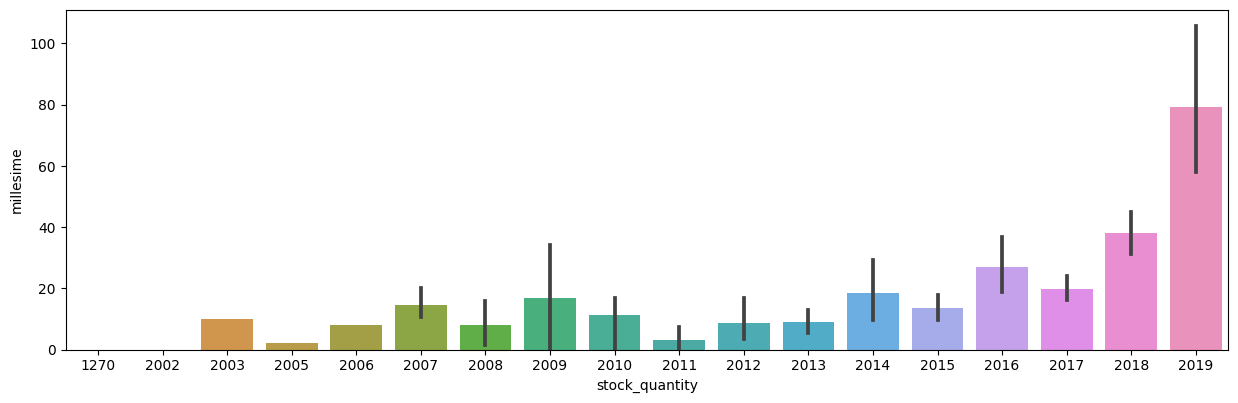

In [64]:
figure, axes = plt.subplots(1, 1)
g = sns.barplot(data=df_millesime, x="millesime",y="stock_quantity")
g.set_ylabel("millesime")
g.set_xlabel("stock_quantity")
figure.set_size_inches(15, 4.5, forward=True)
figure.set_dpi(100)
plt.show

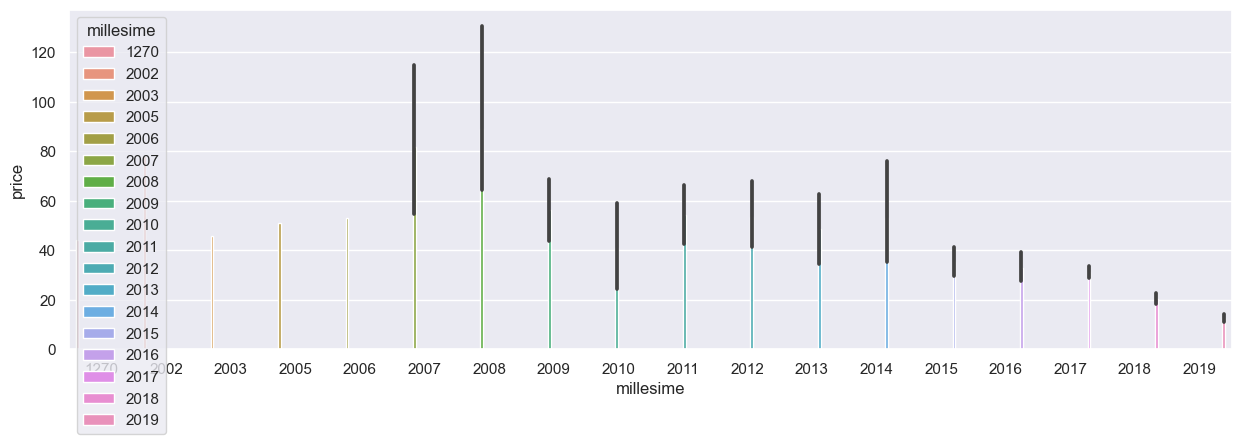

In [142]:
#(df, xName, yName, hueName, title, verbose=False)
figure, axes = plt.subplots(1, 1)
figure.set_size_inches(15, 4.5, forward=True)
figure.set_dpi(100)
#figure.legend=False
data_nova2 = df_millesime[[data_name, "price", "name"]]
displayBarGraphSeaborn(data_nova2, xName=data_name, yName="price", hueName=data_name, title="")

In [76]:
df_by_year = df.loc[df["millesime"]>0, ["millesime", "price"]].value_counts()
#df_by_year = df_by_year.sort_values("price", ascending=False)
df_by_year.head(10)

millesime  price
2017       45.0     15
2018       45.0     13
           31.0     12
2017       31.0     12
2018       13.5      9
           27.9      8
           11.1      8
           9.9       8
2017       26.5      8
2019       8.7       8
dtype: int64

In [65]:
df_by_year.index

MultiIndex([(2017,  45.0),
            (2018,  45.0),
            (2018,  31.0),
            (2017,  31.0),
            (2018,  13.5),
            (2018,  27.9),
            (2018,  11.1),
            (2018,   9.9),
            (2017,  26.5),
            (2019,   8.7),
            ...
            (2018,  73.0),
            (2018,  73.5),
            (2018,  84.7),
            (2018,  86.1),
            (2018,  92.0),
            (2018, 144.0),
            (2018,  19.9),
            (2018,   8.0),
            (2017,  36.9),
            (2017,  23.6)],
           names=['millesime', 'price'], length=586)

In [67]:
df_by_year_index = df_by_year.reset_index()
df_by_year_index.index

RangeIndex(start=0, stop=586, step=1)

In [68]:
df_by_year_index.columns

Index(['millesime', 'price', 0], dtype='object')

In [77]:
df_by_year2 = df_by_year_index.sort_values("millesime")
df_by_year2

,millesime,price,0
298,1270,44.0,2
469,2002,78.0,2
396,2003,45.9,2
395,2005,51.0,2
394,2006,53.0,2
...,...,...,...
106,2019,6.5,4
149,2019,7.6,2
176,2019,16.3,2
132,2019,8.5,2


<AxesSubplot:xlabel='millesime', ylabel='price'>

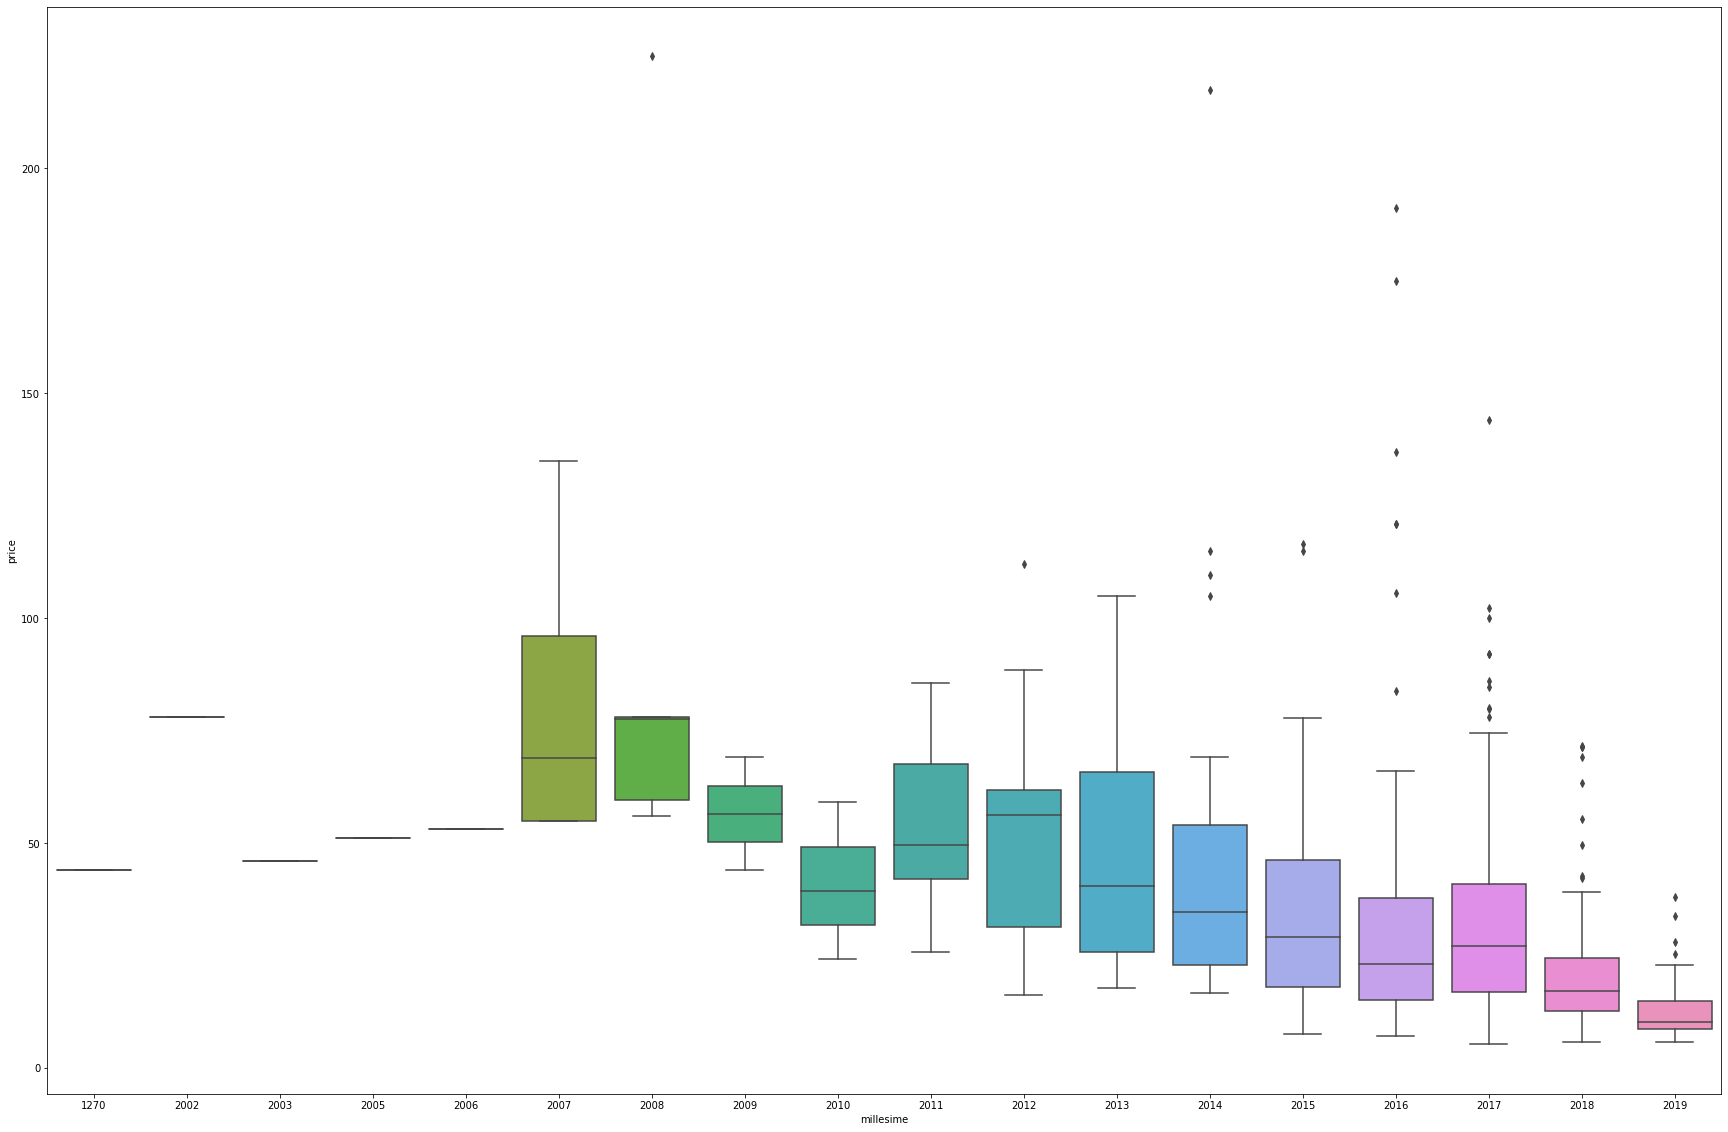

In [88]:
plt.figure(figsize=(30,20))
df_millesime_sort = df_millesime.sort_values('millesime')
sns.boxplot(data=df_millesime_sort[['millesime','price']],x='millesime',y='price')

In [74]:
df_millesime_sort[['millesime','price']]

,millesime,price
225,1270,44.0
457,2002,78.0
720,2003,45.9
744,2005,51.0
73,2006,53.0
...,...,...
113,2019,9.5
121,2019,9.4
187,2019,11.6
122,2019,5.8


<AxesSubplot:xlabel='millesime', ylabel='price'>

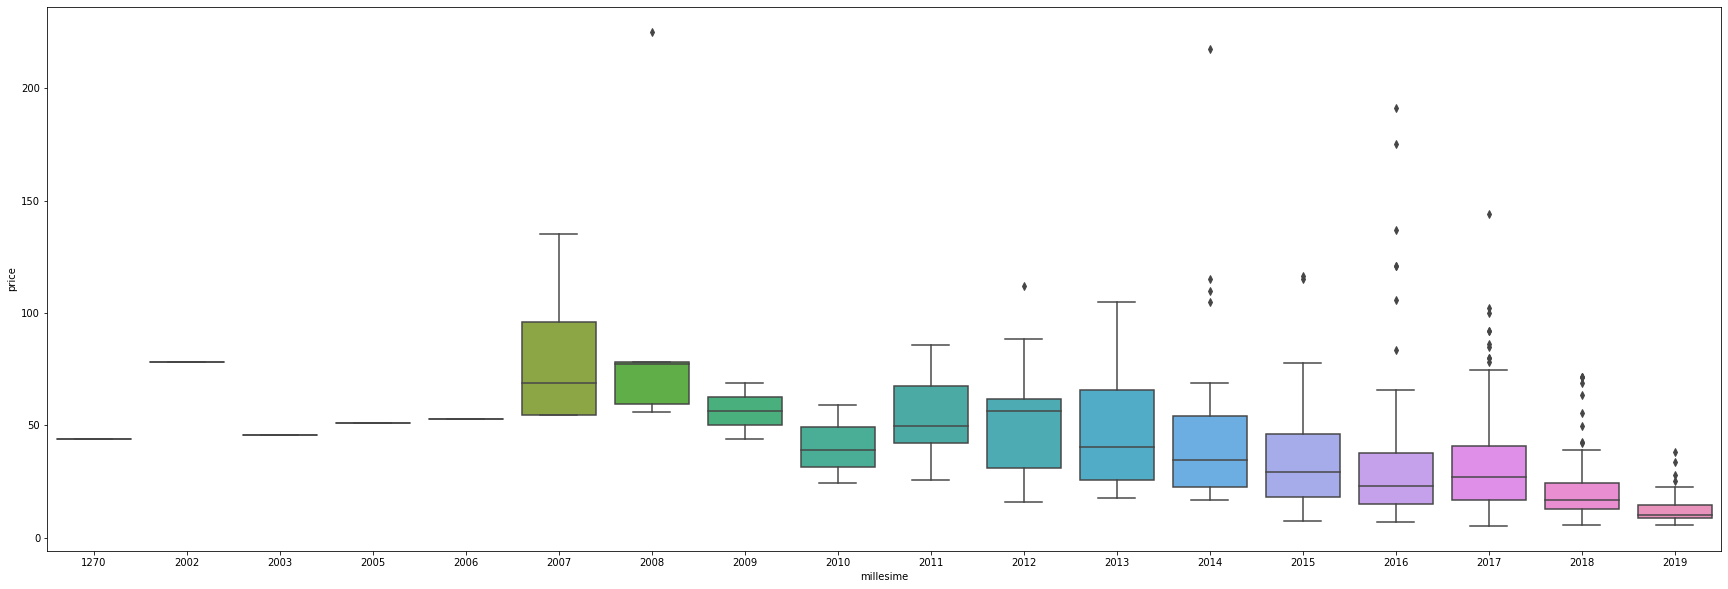

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df_millesime_sort[['millesime','price']],x='millesime',y='price')

<AxesSubplot:xlabel='millesime', ylabel='price'>

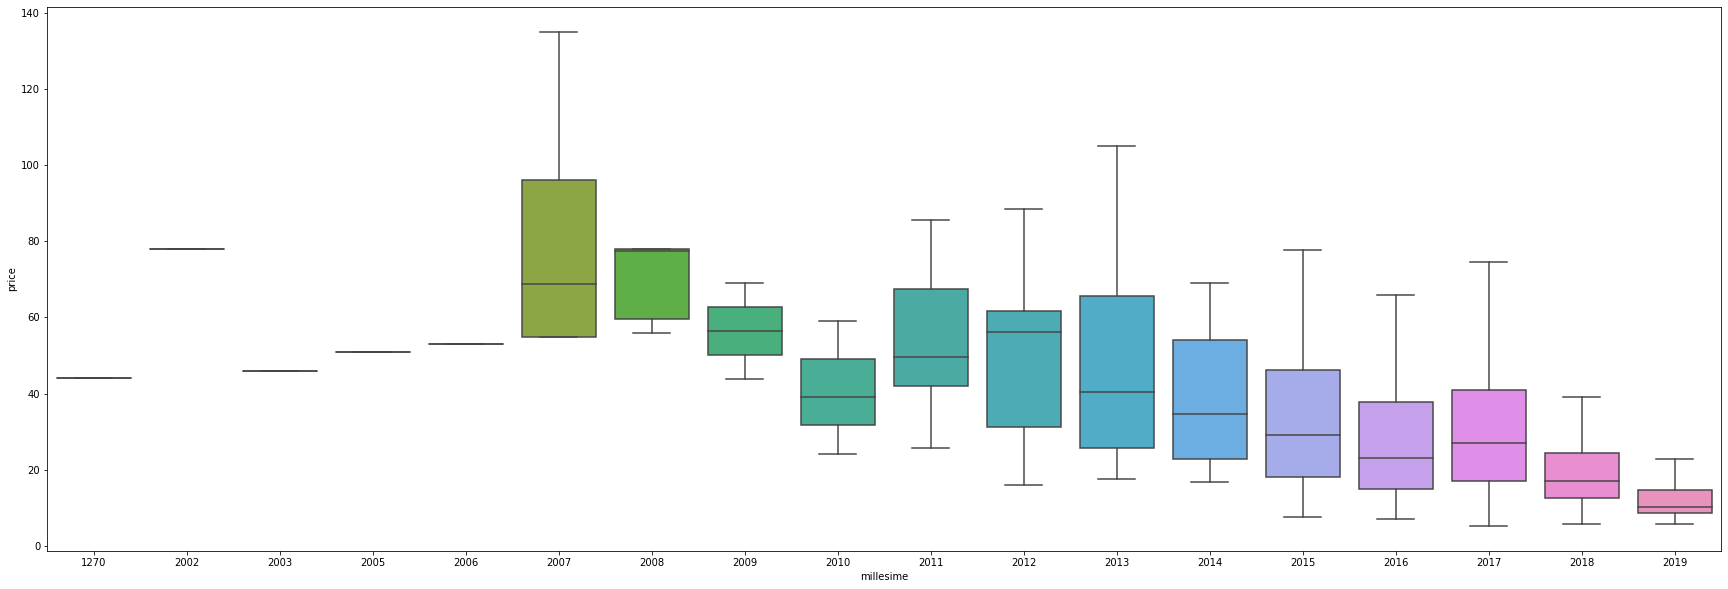

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df_millesime_sort[['millesime','price']],x='millesime',y='price', showfliers=False)

In [76]:
dict_q_max = {}

for annee in df_millesime_sort['millesime'].unique():
    sous_ens = df_millesime_sort[df_millesime_sort['millesime']==annee]
    # .quantile(0.25) pour Q1
    q_low = sous_ens['price'].quantile(0.25)
    #  .quantité(0.75) pour Q3
    q_hi  = sous_ens['price'].quantile(0.75)
    # IQR = Q3 - Q1
    iqr = q_hi - q_low
    # Max = Q3 + (1.5 * IQR)
    q_max = q_hi + (1.5 * iqr)
    # Min = Q1 - (1.5 * IQR)
    q_min = q_low - (1.5 * iqr)
    dict_q_max[annee] = q_max

dict_q_max

{1270: 44.0,
 2002: 78.0,
 2003: 45.9,
 2005: 51.0,
 2006: 53.0,
 2007: 157.8,
 2008: 105.6,
 2009: 81.55000000000001,
 2010: 75.2,
 2011: 105.75,
 2012: 107.575,
 2013: 125.75,
 2014: 100.8,
 2015: 88.35,
 2016: 72.0,
 2017: 76.88749999999999,
 2018: 42.0375,
 2019: 23.950000000000003}

In [95]:
list_index = []
for annee, q_max in dict_q_max.items():
    print(annee, end="")
    sous_ens = df_millesime_sort[df_millesime_sort['millesime']==annee]
    print("=>",sous_ens.shape, end="")
    sous_ens = sous_ens[sous_ens['price'] > q_max]
    print("=>", sous_ens.shape)
    if sous_ens is not None and sous_ens.shape[0]>0:
        list_index.extend(sous_ens.index)

print(list_index)

1270=> (1, 38)=> (0, 38)
2002=> (1, 38)=> (0, 38)
2003=> (1, 38)=> (0, 38)
2005=> (1, 38)=> (0, 38)
2006=> (1, 38)=> (0, 38)
2007=> (4, 38)=> (0, 38)
2008=> (8, 38)=> (1, 38)
2009=> (2, 38)=> (0, 38)
2010=> (3, 38)=> (0, 38)
2011=> (9, 38)=> (0, 38)
2012=> (15, 38)=> (1, 38)
2013=> (14, 38)=> (0, 38)
2014=> (20, 38)=> (4, 38)
2015=> (56, 38)=> (2, 38)
2016=> (111, 38)=> (7, 38)
2017=> (278, 38)=> (10, 38)
2018=> (150, 38)=> (9, 38)
2019=> (63, 38)=> (4, 38)
[208, 475, 711, 465, 240, 460, 703, 708, 712, 709, 598, 702, 551, 411, 635, 722, 724, 410, 66, 242, 132, 19, 486, 545, 10, 562, 563, 330, 9, 746, 18, 555, 793, 518, 706, 16, 125, 153]


In [95]:
df_group[data_name, "price"].head()

C:\Users\User\AppData\Local\Temp/ipykernel_8908/1285125782.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group[data_name, "price"].head()


,name,price
8124,Champagne Gosset Grand Blanc de Blancs,49.0
8123,Champagne Gosset Grand Blanc de Blancs,49.0
7877,Champagne Gosset Grand Rosé,49.0
7878,Champagne Gosset Grand Rosé,49.0
8172,Cognac Frapin VIP XO,176.0
...,...,...
38,NaN,86.1
39,NaN,86.1
40,NaN,86.1
41,NaN,86.1


In [100]:
figure, axes = plt.subplots(1, 1)
df2 = df[[data_name, "price"]].copy()
sns.set()
df2.plot(kind='barh', ax=axes)
figure.set_size_inches(7, 8, forward=True)
figure.set_dpi(100)
plt.show()